C:\Users\chaha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


✅ Accuracy: 0.992123717202399

📄 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    553574
           1       0.31      0.82      0.45      2145

    accuracy                           0.99    555719
   macro avg       0.65      0.91      0.72    555719
weighted avg       1.00      0.99      0.99    555719

📸 Confusion matrix saved as 'conf_matrix_fraud.png'


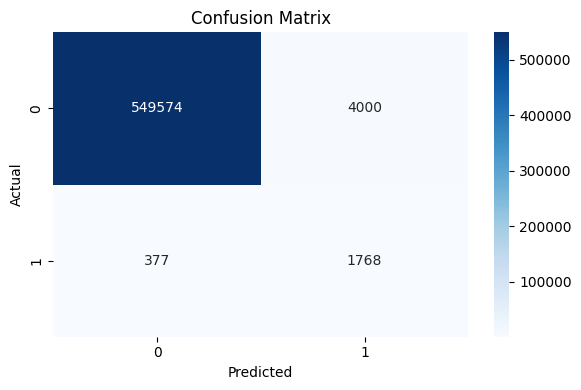

In [1]:
# Imports
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import gradio as gr

# Load the data
train_data = pd.read_csv(r"C:\Users\chaha\Downloads\archive (5)\fraudTrain.csv")
test_data = pd.read_csv(r"C:\Users\chaha\Downloads\archive (5)\fraudTest.csv")

# Drop unnecessary columns
columns_to_drop = ['Unnamed: 0', 'trans_date_trans_time', 'first', 'last', 'street', 'city',
                   'state', 'zip', 'dob', 'unix_time', 'merchant', 'trans_num', 'job']
train_data.drop(columns=columns_to_drop, inplace=True)
test_data.drop(columns=columns_to_drop, inplace=True)

# Encode categorical columns
cat_cols = train_data.select_dtypes(include='object').columns
le_dict = {}

for col in cat_cols:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col])
    
    # Handle unseen labels in test set
    test_data[col] = test_data[col].map(lambda x: le.transform([x])[0] if x in le.classes_ else -1)
    le_dict[col] = le  # Save encoder for Gradio use

# 🎯 Features and Target
X_train = train_data.drop('is_fraud', axis=1)
y_train = train_data['is_fraud']
X_test = test_data.drop('is_fraud', axis=1)
y_test = test_data['is_fraud']

# Training the Random Forest Classifier
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    min_samples_leaf=10,
    class_weight='balanced',
    n_jobs=-1,
    random_state=42
)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("✅ Accuracy:", accuracy)
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("conf_matrix_fraud.png")
print("📸 Confusion matrix saved as 'conf_matrix_fraud.png'")




